In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline

In [82]:
#Datas para criação do dataframe
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

start = datetime(2018,1,1)
end = datetime(2020, 11, 9)


# Ativos da Carteira

In [83]:
# Bovespa
BVSP= data.DataReader('^BVSP', data_source='yahoo', start=start)['Adj Close']


In [84]:
#ativos/ações - Litecoin está em dolar
tickers=['ENBR3.SA', 'ABEV3.SA','ITUB3.SA','ITUB4.SA','BBDC4.SA', 'ITSA4.SA']

#busca os ativos de acordo com a data inicial e final
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [85]:
#Mostra informacoes
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 705 entries, 2018-01-02 to 2020-11-09
Data columns (total 6 columns):
ENBR3.SA    705 non-null float64
ABEV3.SA    705 non-null float64
ITUB3.SA    705 non-null float64
ITUB4.SA    705 non-null float64
BBDC4.SA    705 non-null float64
ITSA4.SA    705 non-null float64
dtypes: float64(6)
memory usage: 38.6 KB


In [86]:
#informações sobre acoes
acoes.describe()

,ENBR3.SA,ABEV3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,16.107152,16.903324,26.223521,29.853868,27.146755,10.685472
std,3.132809,2.789910,3.064794,4.276779,5.537961,1.527986
min,11.101231,11.030000,19.550209,20.371880,16.857166,7.466151
25%,12.709486,14.930000,23.272696,26.213955,21.779346,9.414878
50%,17.014999,17.338669,26.708670,30.929964,26.513666,10.690781
75%,18.441813,18.487333,29.061726,33.528454,32.458061,11.915326
max,22.923166,22.974274,31.808180,37.184467,37.126244,13.962344


In [87]:
acoes.loc['2020-10-1':'2020-11-09'].tail(5)

,ENBR3.SA,ABEV3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
Date,,,,,,
2020-11-03,17.330000,12.78,22.280001,24.040001,20.831026,9.18
2020-11-04,17.850000,12.82,23.150000,25.000000,20.680000,9.39
2020-11-05,18.389999,13.33,23.660000,25.590000,21.000000,9.78
2020-11-06,18.620001,13.35,23.709999,25.670000,20.900000,9.82
2020-11-09,18.770000,13.91,25.180000,27.480000,22.860001,10.33


In [88]:
#pega os maximo valor de fechamento
acoes.max()

ENBR3.SA    22.923166
ABEV3.SA    22.974274
ITUB3.SA    31.808180
ITUB4.SA    37.184467
BBDC4.SA    37.126244
ITSA4.SA    13.962344
dtype: float64

In [89]:
#pega os maximo valor de fechamento
acoes.min()

ENBR3.SA    11.101231
ABEV3.SA    11.030000
ITUB3.SA    19.550209
ITUB4.SA    20.371880
BBDC4.SA    16.857166
ITSA4.SA     7.466151
dtype: float64

# Normalization to 100

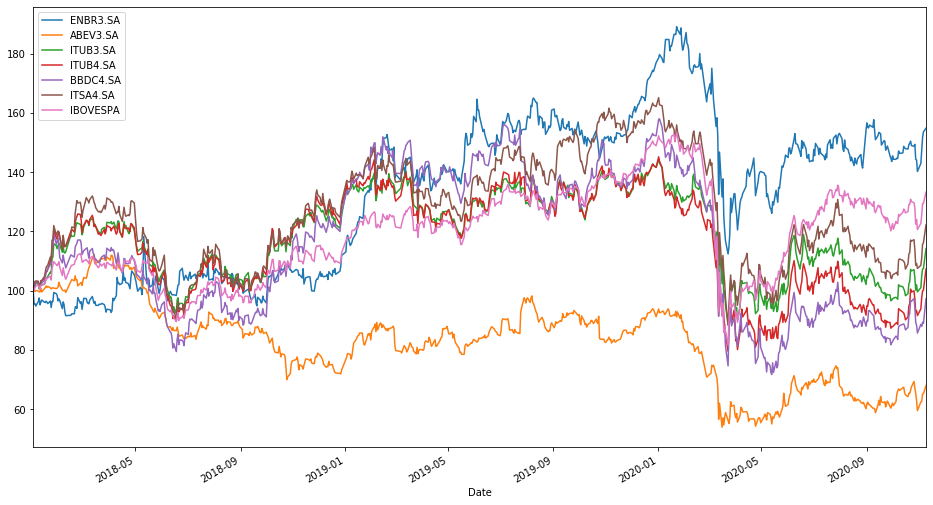

In [90]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
(BVSP / BVSP.iloc[0] * 100).plot(figsize = (16,9), label='IBOVESPA');
plt.legend()
plt.show()

In [91]:
#verifica retorno das acoes fechamento atual / fechamento anterior -1
returns = acoes.pct_change()  
#pode ser assim tambem
#returns = acoes / acoes.shift(1) - 1


In [92]:
#returns.head()
returns.max()


ENBR3.SA    0.155556
ABEV3.SA    0.098712
ITUB3.SA    0.110330
ITUB4.SA    0.110593
BBDC4.SA    0.168669
ITSA4.SA    0.100324
dtype: float64

In [93]:
#returns_desvio padrão
returns.std()

ENBR3.SA    0.021574
ABEV3.SA    0.020994
ITUB3.SA    0.020113
ITUB4.SA    0.022659
BBDC4.SA    0.026026
ITSA4.SA    0.022063
dtype: float64

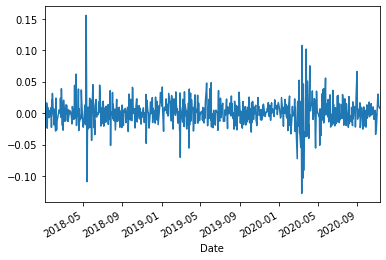

In [94]:
#desta forma podemos ver a variação
returns['ENBR3.SA'].plot()

In [95]:
# Peso das carteiras. ativos com suas respectivas porcentagem  (quantidade da acoes em relação ao valor atual total)
#['ENBR3.SA', 'ABEV3.SA','ITUB3.SA','ITUB4.SA','BBDC4.SA', 'ITSA4.SA' ]
weights = np.array([ 0.10, 0.10, 0.20, 0.20, 0.20, 0.20])
weights.sum()

1.0

In [96]:
np.dot(returns, weights)

array([            nan,  1.91739846e-03,  1.30233221e-02,  2.92259237e-03,
       -5.58189360e-04, -9.08423293e-03, -4.38420025e-03,  1.79187869e-02,
       -2.58156840e-03,  6.00205917e-03,  7.37658981e-03,  1.46861940e-02,
        8.10366848e-05,  4.35784570e-03,  1.60859788e-02, -5.95582414e-03,
        4.60333273e-02,  0.00000000e+00,  3.68620145e-02, -1.74694632e-02,
        2.55147532e-04,  6.24962275e-03, -1.21309797e-03, -1.44825211e-02,
       -2.50218918e-02,  2.55403997e-02, -1.65727457e-02, -8.12280546e-03,
       -3.32815883e-03,  3.72038747e-02,  5.71398530e-03, -3.17576031e-03,
        2.64171917e-02,  8.79100052e-03,  6.41164304e-03,  3.65741145e-03,
       -1.63757330e-03, -8.74583431e-03, -2.60222697e-02,  1.23973760e-02,
        1.03047804e-02,  1.23267195e-02, -1.12846300e-03, -4.36673521e-03,
       -6.38204461e-03,  1.34978350e-02,  1.03358507e-02, -7.72188730e-03,
       -1.04295619e-02, -3.27420566e-03, -5.94762348e-03, -1.03314064e-02,
       -9.34566311e-05,  

In [97]:
# Retorno Anual 
anual_returns = returns.mean() * 250 
anual_returns

ENBR3.SA    0.213287
ABEV3.SA   -0.081381
ITUB3.SA    0.097493
ITUB4.SA    0.088991
BBDC4.SA    0.074533
ITSA4.SA    0.132083
dtype: float64

In [98]:
# Retorno anual da carteira com seus respectivos pesos
portofolio_1 = str(round(np.dot(anual_returns, weights),5) *100) + ' %'
print(portofolio_1) 

9.181000000000001 %
